dataset  GTI_Far contains 834  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI_Left contains 909  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI_Right contains 664  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI_MiddleClose contains 419  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  KITTI_extracted contains 5966  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI contains  3900  non cars 
of size:  (64, 64, 3)  and data type: float32
dataset  Extras contains  5068  non cars 
of size:  (64, 64, 3)  and data type: float32
There are total  8792 number of cars. And a total of  8968  number of non cars.


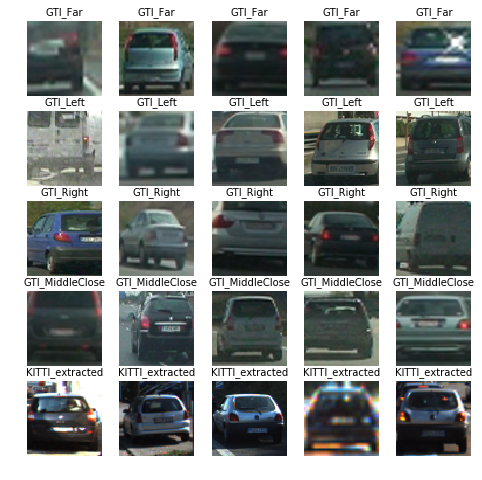

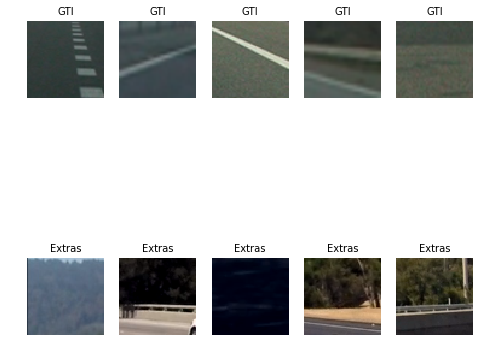

In [32]:
#Data exploration
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
%matplotlib inline 


# Define a function to return some characteristics of the dataset 
def data_peek(data_paths):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["count"] = len(data_paths)
    # Read in a test image
    example_img = mpimg.imread(data_paths[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

    
car_data_sets = ["./dataset/vehicles/GTI_Far", "./dataset/vehicles/GTI_Left", "./dataset/vehicles/GTI_Right",
                   "./dataset/vehicles/GTI_MiddleClose", "./dataset/vehicles/KITTI_extracted"]

non_car_data_sets = ["./dataset/non-vehicles/GTI", "./dataset/non-vehicles/Extras"]


all_cars = []
total_cars_size = 0

visualize_number = 5

fig, axs = plt.subplots(len(car_data_sets), visualize_number, figsize=(8, 8))
axs = axs.ravel()

for index, dataset in enumerate(car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    all_cars.append(paths)
    name = dataset.split("/")[-1]
    data_info = data_peek(paths)
    total_cars_size += data_info["count"]
    print('dataset ', name, "contains",
      data_info["count"], ' cars ')
    print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
    
    for i in range(visualize_number): 
        example_ind = np.random.randint(0, data_info["count"])
        example_img = mpimg.imread(paths[example_ind])
        num = index * visualize_number + i
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(example_img)


all_non_cars = []
total_non_cars_size = 0

fig, axs = plt.subplots(len(non_car_data_sets), visualize_number, figsize=(8, 8))
axs = axs.ravel()
for index, dataset in enumerate(non_car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    all_non_cars.append(paths)
    name = dataset.split("/")[-1]
    data_info = data_peek(paths)
    total_non_cars_size += data_info["count"]
    print('dataset ', name, "contains ",
      data_info["count"], ' non cars ')
    print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"]) 
    
    for i in range(visualize_number): 
        example_ind = np.random.randint(0, data_info["count"])
        example_img = mpimg.imread(paths[example_ind])

        num = index * visualize_number + i
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(example_img)

        
all_cars = np.hstack(all_cars)
all_non_cars = np.hstack(all_non_cars)
print("There are total ", total_cars_size, "number of cars. And a total of ", total_non_cars_size, " number of non cars.")

    



In [33]:
import utils

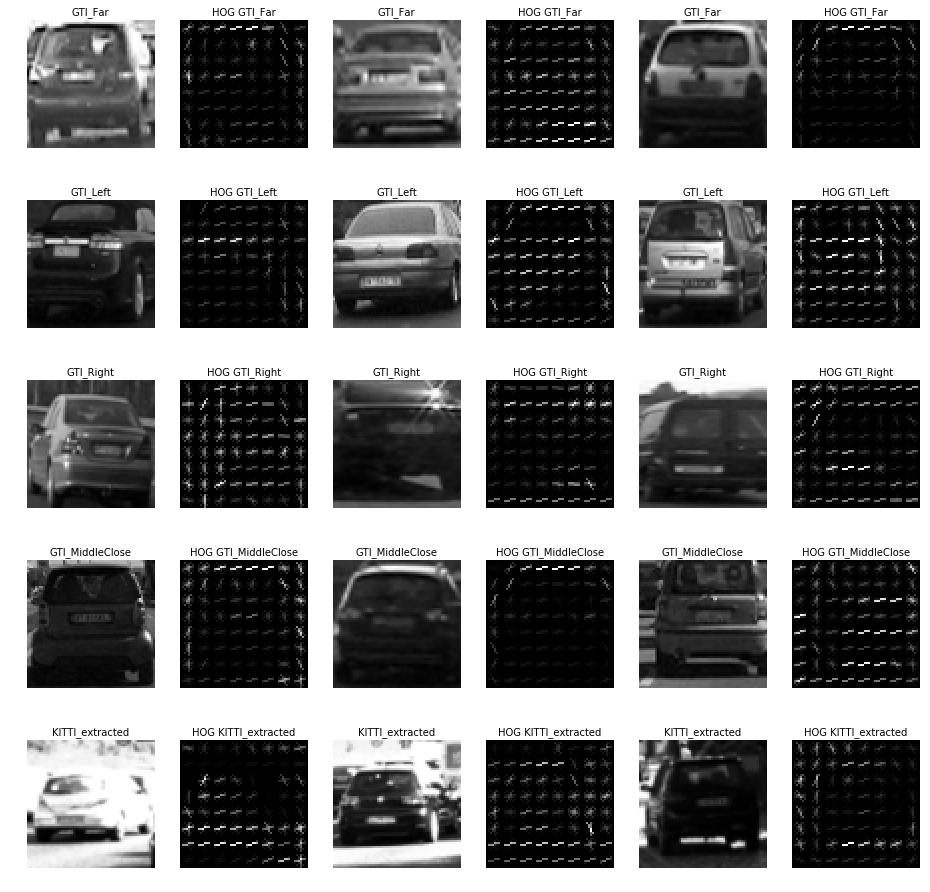

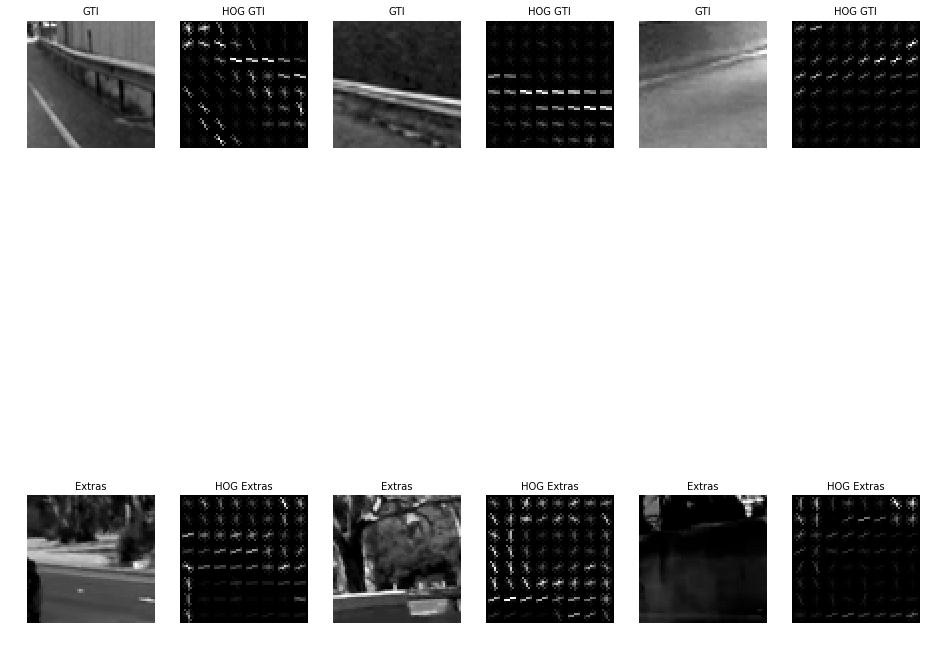

In [34]:
#Visualize HOG

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2


visualize_number = 3
fig, axs = plt.subplots(len(car_data_sets), visualize_number * 2, figsize=(16, 16))
axs = axs.ravel()

for index, dataset in enumerate(car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    name = dataset.split("/")[-1]

    for i in range(visualize_number): 
        example_ind = np.random.randint(0, len(paths))
        example_img = mpimg.imread(paths[example_ind])
    
        gray = cv2.cvtColor(example_img, cv2.COLOR_RGB2GRAY)
        
        # Call our function with vis=True to see an image output
        features, hog_image = utils.get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        
        num = (index * visualize_number + i) * 2
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(gray, cmap='gray')
        
        axs[num + 1].set_title("HOG " + name , fontsize=10)
        axs[num + 1].axis('off')
        axs[num + 1].imshow(hog_image, cmap='gray')

fig, axs = plt.subplots(len(non_car_data_sets), visualize_number * 2, figsize=(16, 16))
axs = axs.ravel()
for index, dataset in enumerate(non_car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    name = dataset.split("/")[-1]

    for i in range(visualize_number): 
        example_ind = np.random.randint(0, len(paths))
        example_img = mpimg.imread(paths[example_ind])
    
        gray = cv2.cvtColor(example_img, cv2.COLOR_RGB2GRAY)
        
        # Call our function with vis=True to see an image output
        features, hog_image = utils.get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        
        num = (index * visualize_number + i) * 2
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(gray, cmap='gray')
        
        axs[num + 1].set_title("HOG " + name , fontsize=10)
        axs[num + 1].axis('off')
        axs[num + 1].imshow(hog_image, cmap='gray')        
        
        


##

In [35]:
#Training Hyperparameters
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()
test_set_size = 0.2

In [36]:
#search and classify
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
    
    
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 1500
cars = all_cars#[0:sample_size]
notcars = all_non_cars#[0:sample_size]

car_features = utils.extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, cbins_range=(0,1),
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = utils.extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, cbins_range=(0,1),
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
#X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X #X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=test_set_size, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()




Using: 11 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6468
5.26 Seconds to train SVC...
Test Accuracy of SVC =  0.984


In [37]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell,
              cell_per_block, spatial_size, hist_bins, hog_channel=hog_channel, color_space=color_space, spatial_feat=True, 
                        hist_feat=True, hog_feat=True):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
        
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = utils.convert_color(img_tosearch, color_space)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    
    if (hog_channel == "ALL"):
        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]
    else:
        ch1 = ctrans_tosearch[:,:,hog_channel]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = utils.get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    if(hog_channel == "ALL"):
        hog2 = utils.get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = utils.get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    output_boxes = []

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            if(hog_channel == "ALL"):
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            else: hog_features = hog_feat1

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            features = []
            # Get color features
            if(spatial_feat == True):
                spatial_features = utils.bin_spatial(subimg, size=spatial_size)
                features.append(spatial_features)
            if(hist_feat == True):
                hist_features = utils.color_hist(subimg, nbins=hist_bins)
                features.append(hist_features)
            if(hog_feat == True):
                features.append(hog_features)

            all_features = np.concatenate(features)
            # Scale features and make a prediction
            #test_features = X_scaler.transform(all_features.reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(all_features.reshape(1, -1))
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                output_boxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return output_boxes

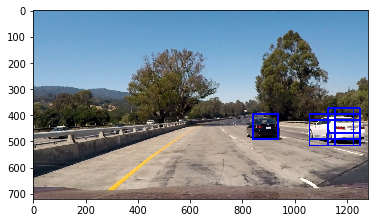

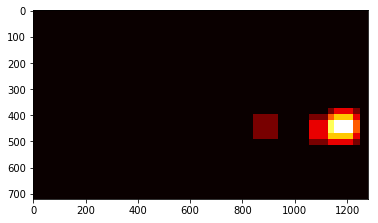

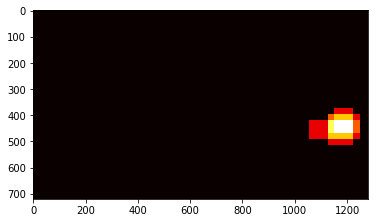

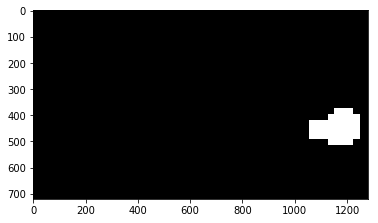

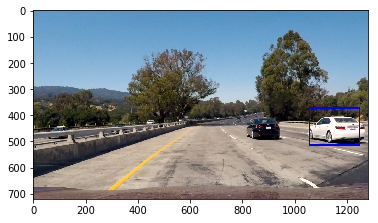

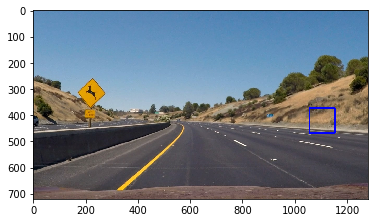

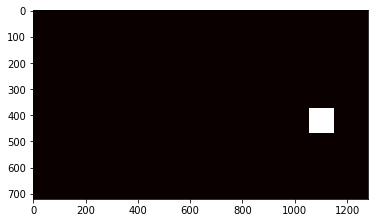

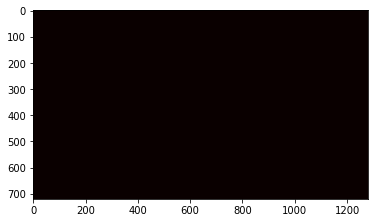

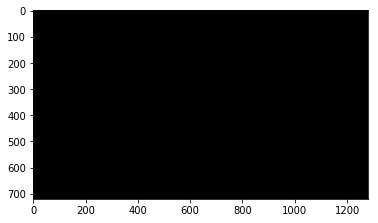

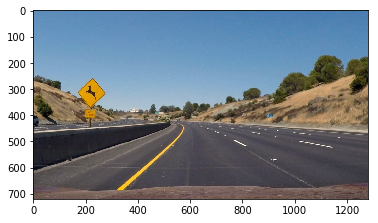

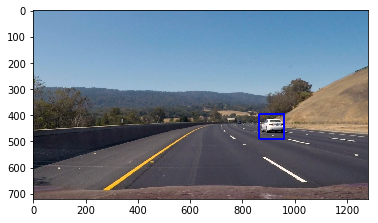

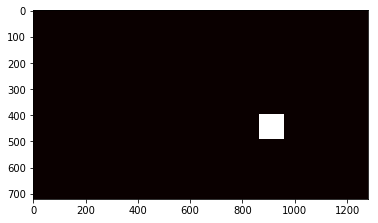

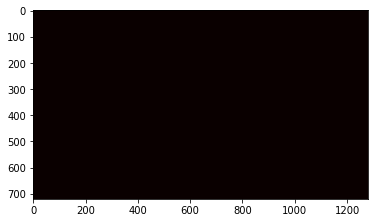

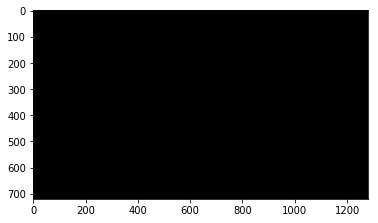

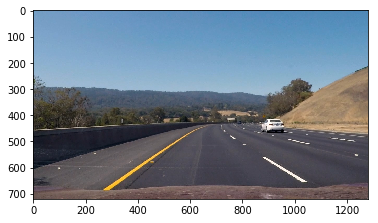

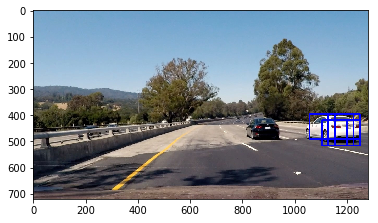

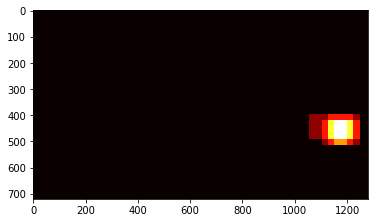

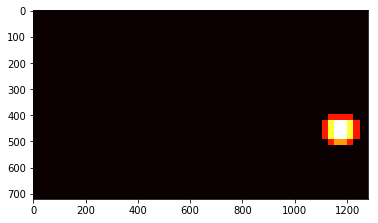

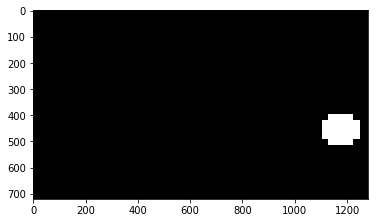

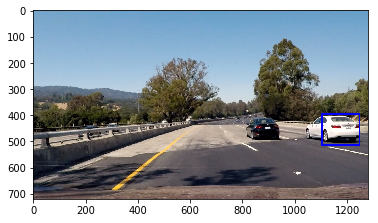

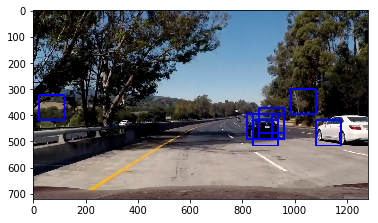

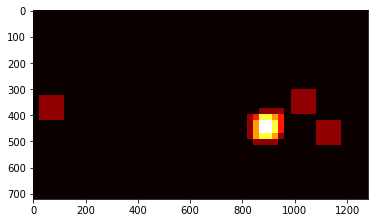

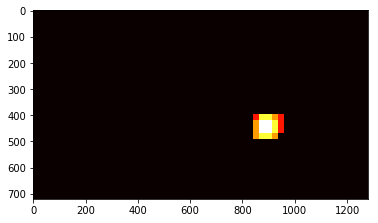

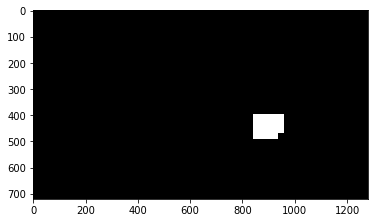

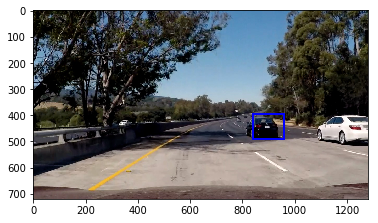

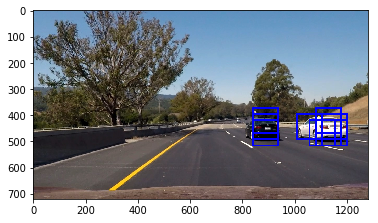

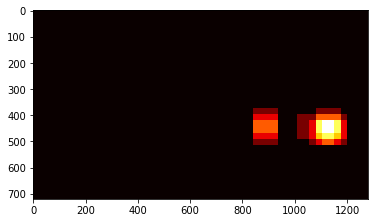

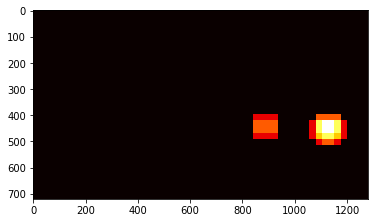

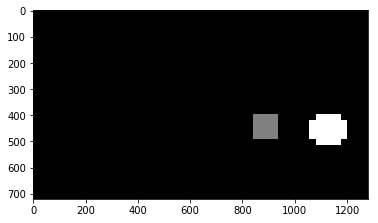

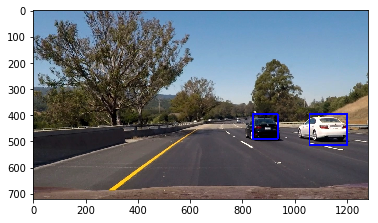

In [38]:
from scipy.ndimage.measurements import label

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

ystart = 300
ystop = 656
scale = 1.5
    
test_images_paths =  glob.glob('./test_images/*.jpg')

for test_image in test_images_paths:
    img = mpimg.imread(test_image)

    plt.figure()
    boxes = find_cars(img, ystart, ystop, scale, svc, None, orient, pix_per_cell, cell_per_block
                        ,spatial_size, hist_bins, hog_channel,color_space, spatial_feat, hist_feat, hog_feat)
    with_boxes = utils.draw_boxes(img, boxes)
    plt.imshow(with_boxes)
    
    test_heatmap = np.zeros_like(img[:,:,0])
    heatmap = utils.add_heat(test_heatmap, boxes)
    plt.figure()
    plt.imshow(heatmap, cmap='hot')
    
    thresholded = utils.apply_threshold(heatmap, 1)
    plt.figure()
    plt.imshow(thresholded, cmap='hot')
    
    labeled = label(thresholded)
    plt.figure()
    plt.imshow(labeled[0], cmap='gray')
    
    # Draw bounding boxes on a copy of the image
    bounding_box_image = draw_labeled_bboxes(np.copy(img), labeled)
    # Display the image
    plt.figure()
    plt.imshow(bounding_box_image)

In [39]:
class Multiple_Frames_State():
    def __init__ (self, history_length):
        self.list_length = history_length 
        self.frame_boxes = []

    def add_frame_boxes (self, boxes):
        if (len(self.frame_boxes) > self.list_length):
            tmp = self.frame_boxes.pop(0)
        
        self.frame_boxes.extend(boxes)
        
    def get_frame_boxes (self):
        return self.frame_boxes

In [64]:
def car_detection_pipeline(svc, X_scaler, orient, pix_per_cell,
              cell_per_block, spatial_size, hist_bins, hog_channel, color_space,
                           spatial_feat, hist_feat, hog_feat, multiple_frames_state, threshold, img):

    boxes = []

   # scales = [[200,400,1.5]]
  #  ,[400,528,2.0],[400,596,3.5], [200,400,1.5]]
    
    #scales = [[250,470,1.0], [300,670,1.5],[350,500,1.7],[400,550,1.7],[550,650,2.0],[400,600,3.5]]

    #scales = [[250,470,1.3], [300,600,1.5],[350,550,1.7],[550,700,1.9],[550,700,2.0],[300,400,1.0]]
    
    #scales = [[250,470,1.3], [300,600,1.5],[350,550,1.7],[550,700,1.9],[550,700,2.0]]
    
    #scales = [[250,470,1.3], [300,600,1.5],[350,550,1.7],[550,650,1.9],[600,670,2.0]]

   # scales = [[250,350,1.3], [300,550,1.5], [300,550,1.2], [300,550,1.1], [300,550,1.4], [400,600,1.7], [400,600,2.0],
   #         [600,650,2.0], [600,670,3.0]
   #          ,[300,600,1.7],[350,550,1.9],
   #          [550,700,1.9],[550,700,2.0]]

    #scales = [[200,400,1.0], [400,600, 1.5], [600, 650, 2.0]]# <------ GOOD
     
    #scales = [[200,300,1.0], [300,400, 1.5], [400,600, 2.5], [600, 650, 3.0]]
    
    scales = [[330,400,1.3], [330,400,1.5], [400,600, 1.3], [400,600, 1.5], [600, 650, 1.7]]

    for config in scales:
        ystart = config[0]
        ystop = config[1]
        scale = config[2]
        boxes.append(find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block
                        , spatial_size, hist_bins, hog_channel, color_space, spatial_feat, hist_feat, hog_feat))

    boxes = [item for sublist in boxes for item in sublist] 
 #   if(multiple_frames_state != None):
 #       multiple_frames_state.add_frame_boxes(boxes)
 #       boxes = multiple_frames_state.get_frame_boxes()


    heatmap_img = np.zeros_like(img[:,:,0])
    for box in boxes:
        heatmap_img = utils.add_heat(heatmap_img, boxes)
    
    heatmap_img = utils.apply_threshold(heatmap_img, threshold)
    labels = label(heatmap_img)

    with_boxes = draw_labeled_bboxes(np.copy(img), labels)
     
   #plt.figure()
   #to_draw = utils.draw_boxes(np.copy(img), boxes)
   #plt.imshow(to_draw)
    return with_boxes


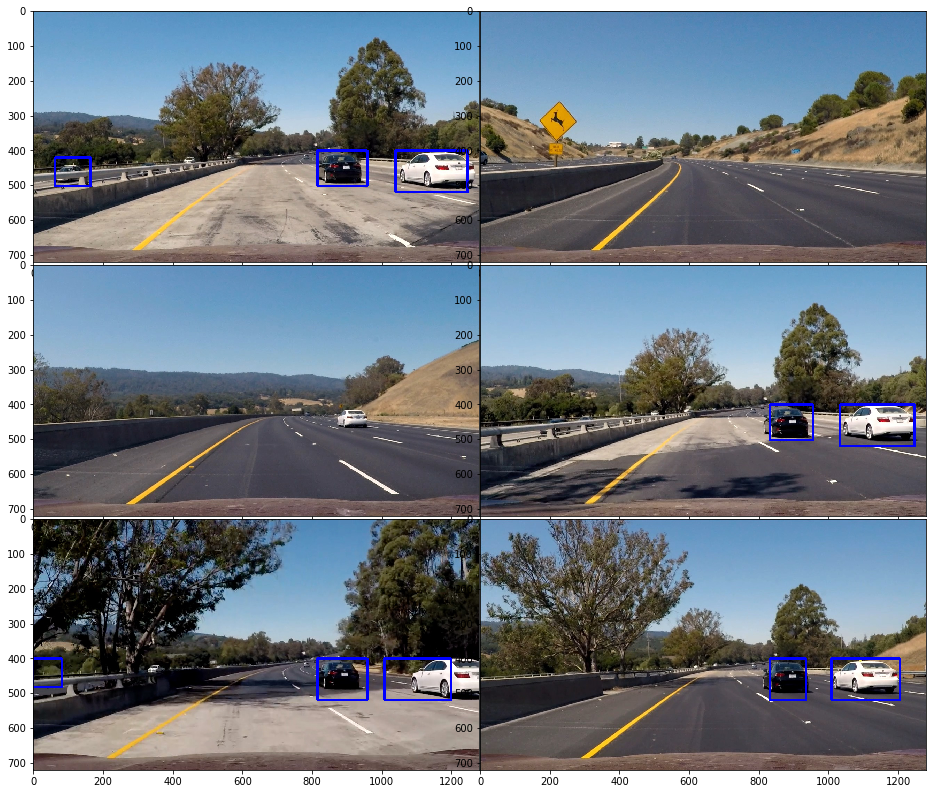

In [65]:
test_images =  glob.glob('./test_images/*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(car_detection_pipeline(svc, None, orient, pix_per_cell, cell_per_block
                        , spatial_size, hist_bins,hog_channel, color_space,
                        spatial_feat, hist_feat, hog_feat, None, 10, mpimg.imread(im)))

In [74]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from functools import partial

test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('test_video.mp4')

state = Multiple_Frames_State(3)
car_detect = partial(car_detection_pipeline, svc, None, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins
           , hog_channel, color_space, spatial_feat, hist_feat, hog_feat, None, 3)



clip_test_out = clip_test.fl_image(car_detect)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4



 97%|█████████▋| 38/39 [00:14<00:00,  2.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

CPU times: user 13.4 s, sys: 1.11 s, total: 14.5 s
Wall time: 15.6 s


In [75]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_out_file))

In [77]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from functools import partial
project_out_file = 'project_video_out.mp4'
clip_test = VideoFileClip('project_video.mp4')

state = Multiple_Frames_State(3)
car_detect = partial(car_detection_pipeline, svc, None, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins
           , hog_channel, color_space, spatial_feat, hist_feat, hog_feat, None, 3)


clip_test_out = clip_test.fl_image(car_detect)
%time clip_test_out.write_videofile(project_out_file, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4




  0%|          | 0/1261 [00:00<?, ?it/s]

  0%|          | 1/1261 [00:00<07:56,  2.64it/s]

  1%|          | 13/1261 [00:04<07:39,  2.72it/s]


KeyboardInterrupt: 

In [45]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_out_file))